<a href="https://colab.research.google.com/github/yuliyaosipava/CLustering_on_Python/blob/main/FActor_Nacbank%22Factor_region_BEl_118_28_ipynb%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Факторный анализ
==================

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

Будем анализировать экономические показатели по областям и г.Минску. Их 26

In [2]:
from google.colab import files
uploaded = files.upload()

Saving rajon20202122_01_04_KRS.xlsx to rajon20202122_01_04_KRS.xlsx


pd.read_excel('path_to_file.xls', sheetname='Sheet1')

In [3]:
df = pd.read_excel('rajon20202122_01_04_KRS.xlsx')
df

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
0,101.413631,61.7,117.6,102.1,103.9,7.7,4.714065,5.632268,35.3,146.792511,...,14.634146,100.705467,12.350842,97.6,23.280660,19.477843,36.330814,6.037272,4.340433,1.980076
1,98.796058,101.9,179.8,103.5,104.7,8.7,4.122550,4.444723,32.3,110.623536,...,4.741235,101.978843,15.254307,93.2,16.969950,8.781302,10.884140,1.231285,1.550818,0.762304
2,97.839123,73.9,75.7,86.1,86.1,6.1,8.214997,9.076273,29.3,130.056556,...,12.123205,105.047964,8.735569,88.3,20.765099,15.367752,14.329716,1.970668,2.806664,1.080938
3,100.094987,80.4,91.4,101.8,103.4,8.1,3.338469,3.687625,34.6,77.265955,...,4.949347,101.785917,2.950584,86.9,7.605754,8.970691,17.847034,1.167582,1.405730,0.750561
4,100.090477,81.5,97.5,104.4,106.1,11.7,5.609377,5.952142,33.6,154.116915,...,3.971250,99.527989,3.419470,92.8,10.081942,8.082334,25.416841,2.250524,2.932796,1.391979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,96.954207,99.4,60.2,95.2,97.1,1.3,18.107833,22.330074,31.7,116.196799,...,4.599371,100.408893,8.375696,90.2,4.639716,10.247720,41.128863,2.187767,1.197692,1.690390
350,98.645541,113.2,110.2,97.4,99.6,-19.5,7.343052,7.343052,37.3,91.719960,...,3.948567,97.330161,1.275691,86.7,4.606662,11.136985,42.083629,2.152374,1.452263,1.674598
351,97.043847,90.6,91.0,98.4,100.9,5.8,4.956641,5.146249,33.8,49.426934,...,7.961783,99.444444,5.107337,90.2,10.757254,13.446568,41.854801,2.461548,0.784324,1.080385
352,97.335589,46.9,50.1,98.0,100.0,-10.6,3.712654,3.884007,29.9,59.480760,...,4.297310,96.182424,3.079739,81.7,7.766990,9.867898,24.400764,2.104966,0.539790,1.610377


In [4]:
df.fillna(df.mean())

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
0,101.413631,61.7,117.6,102.1,103.9,7.7,4.714065,5.632268,35.3,146.792511,...,14.634146,100.705467,12.350842,97.6,23.280660,19.477843,36.330814,6.037272,4.340433,1.980076
1,98.796058,101.9,179.8,103.5,104.7,8.7,4.122550,4.444723,32.3,110.623536,...,4.741235,101.978843,15.254307,93.2,16.969950,8.781302,10.884140,1.231285,1.550818,0.762304
2,97.839123,73.9,75.7,86.1,86.1,6.1,8.214997,9.076273,29.3,130.056556,...,12.123205,105.047964,8.735569,88.3,20.765099,15.367752,14.329716,1.970668,2.806664,1.080938
3,100.094987,80.4,91.4,101.8,103.4,8.1,3.338469,3.687625,34.6,77.265955,...,4.949347,101.785917,2.950584,86.9,7.605754,8.970691,17.847034,1.167582,1.405730,0.750561
4,100.090477,81.5,97.5,104.4,106.1,11.7,5.609377,5.952142,33.6,154.116915,...,3.971250,99.527989,3.419470,92.8,10.081942,8.082334,25.416841,2.250524,2.932796,1.391979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,96.954207,99.4,60.2,95.2,97.1,1.3,18.107833,22.330074,31.7,116.196799,...,4.599371,100.408893,8.375696,90.2,4.639716,10.247720,41.128863,2.187767,1.197692,1.690390
350,98.645541,113.2,110.2,97.4,99.6,-19.5,7.343052,7.343052,37.3,91.719960,...,3.948567,97.330161,1.275691,86.7,4.606662,11.136985,42.083629,2.152374,1.452263,1.674598
351,97.043847,90.6,91.0,98.4,100.9,5.8,4.956641,5.146249,33.8,49.426934,...,7.961783,99.444444,5.107337,90.2,10.757254,13.446568,41.854801,2.461548,0.784324,1.080385
352,97.335589,46.9,50.1,98.0,100.0,-10.6,3.712654,3.884007,29.9,59.480760,...,4.297310,96.182424,3.079739,81.7,7.766990,9.867898,24.400764,2.104966,0.539790,1.610377


In [5]:
df = df.filter(regex='^(?!.*Unnamed).*$')
df.head()

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
0,101.413631,61.7,117.6,102.1,103.9,7.7,4.714065,5.632268,35.3,146.792511,...,14.634146,100.705467,12.350842,97.6,23.280660,19.477843,36.330814,6.037272,4.340433,1.980076
1,98.796058,101.9,179.8,103.5,104.7,8.7,4.122550,4.444723,32.3,110.623536,...,4.741235,101.978843,15.254307,93.2,16.969950,8.781302,10.884140,1.231285,1.550818,0.762304
2,97.839123,73.9,75.7,86.1,86.1,6.1,8.214997,9.076273,29.3,130.056556,...,12.123205,105.047964,8.735569,88.3,20.765099,15.367752,14.329716,1.970668,2.806664,1.080938
3,100.094987,80.4,91.4,101.8,103.4,8.1,3.338469,3.687625,34.6,77.265955,...,4.949347,101.785917,2.950584,86.9,7.605754,8.970691,17.847034,1.167582,1.405730,0.750561
4,100.090477,81.5,97.5,104.4,106.1,11.7,5.609377,5.952142,33.6,154.116915,...,3.971250,99.527989,3.419470,92.8,10.081942,8.082334,25.416841,2.250524,2.932796,1.391979


In [6]:
df.describe()

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,...,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,98.689033,93.445198,99.970056,100.744774,102.411811,7.247938,5.788784,6.358556,34.477684,121.905382,...,6.834843,101.272230,11.184068,91.729661,20.126023,11.675170,24.824533,2.213785,1.996369,1.246627
std,1.585203,20.539428,34.620509,5.859017,5.965825,5.398310,7.055578,7.152695,4.514062,65.492294,...,4.161436,3.359874,12.266272,5.490063,19.400960,4.416052,10.837095,1.364759,1.264179,0.789326
min,94.092742,30.500000,18.000000,69.800000,71.100000,-19.500000,0.583227,0.649996,24.500000,24.452645,...,2.683963,87.369863,0.902524,73.500000,3.315006,6.105834,3.126640,0.251434,0.418287,0.000000
25%,97.812537,82.325000,82.225000,98.500000,100.400000,4.800000,3.359020,3.835085,31.200000,86.020997,...,4.589357,99.632718,3.423132,88.500000,8.993920,9.230753,16.706606,1.225657,1.127307,0.679569
50%,98.651099,92.450000,96.300000,100.900000,102.700000,7.300000,4.528696,5.054677,34.200000,108.490176,...,5.509757,100.715578,8.239215,91.650000,14.541076,10.610417,25.358498,1.938187,1.665937,1.098830
75%,99.576078,104.600000,111.650000,102.900000,104.775000,9.900000,6.081486,6.611156,37.300000,142.410283,...,7.270332,102.267955,13.465782,94.800000,22.830122,12.340143,32.897849,2.741718,2.473650,1.682773
max,105.591105,196.900000,360.000000,139.600000,142.400000,38.000000,83.698440,83.846182,48.900000,650.234572,...,33.444996,124.554901,101.604906,113.000000,151.578013,38.542550,48.549618,8.196688,6.085448,4.585522


In [7]:
df.corr()

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
"Average employment of the population for the period, %",1.000000,-0.004604,-0.113208,0.090912,0.023345,0.184377,0.169096,0.172918,-0.124246,0.011616,...,0.299426,0.217273,0.207365,0.472671,0.244601,0.188676,-0.274223,-0.061219,0.032187,-0.122312
Podrjad,-0.004604,1.000000,0.042735,0.099996,0.112036,0.065809,-0.070940,-0.081881,0.083396,-0.109238,...,-0.033319,-0.058388,-0.022387,0.081570,-0.021711,-0.018270,0.040921,0.061323,0.027389,0.026083
INVEST,-0.113208,0.042735,1.000000,0.056482,0.078106,-0.017578,-0.090089,-0.086847,0.100848,0.001224,...,-0.051943,-0.088143,-0.136298,-0.096173,-0.106700,-0.048111,0.046599,0.032255,0.075079,0.018765
Real,0.090912,0.099996,0.056482,1.000000,0.981946,0.092480,0.017079,0.020884,0.046363,0.007557,...,0.139272,0.005428,0.024063,0.082026,0.041828,0.138254,-0.016721,0.032096,-0.037176,-0.013357
retail,0.023345,0.112036,0.078106,0.981946,1.000000,0.061246,0.001060,0.003589,0.131865,0.018111,...,0.042096,-0.095304,-0.038588,0.041497,-0.030709,0.064599,0.092586,0.097795,0.013691,0.044431
rentab,0.184377,0.065809,-0.017578,0.092480,0.061246,1.000000,0.151620,0.167867,-0.095535,-0.123963,...,0.117676,0.388916,0.318383,0.128233,0.246489,-0.009531,-0.341015,0.025305,0.171541,-0.134671
Coeff vvoda,0.169096,-0.070940,-0.090089,0.017079,0.001060,0.151620,1.000000,0.988600,0.000380,-0.006246,...,0.004493,0.057212,0.019861,0.145248,0.012758,-0.009373,0.041415,0.022418,0.038995,0.059718
Coeff obn,0.172918,-0.081881,-0.086847,0.020884,0.003589,0.167867,0.988600,1.000000,-0.012888,-0.012446,...,0.005623,0.074165,0.043357,0.143294,0.038678,-0.011574,0.024260,0.019466,0.041746,0.070303
Obespech,-0.124246,0.083396,0.100848,0.046363,0.131865,-0.095535,0.000380,-0.012888,1.000000,0.140408,...,-0.063237,-0.270289,-0.217027,-0.060520,-0.116457,0.074012,0.516501,0.375055,0.296585,0.299566
Vvod,0.011616,-0.109238,0.001224,0.007557,0.018111,-0.123963,-0.006246,-0.012446,0.140408,1.000000,...,-0.023875,-0.027804,-0.051331,0.086759,-0.005087,0.003460,0.118702,0.013253,-0.010311,0.082556


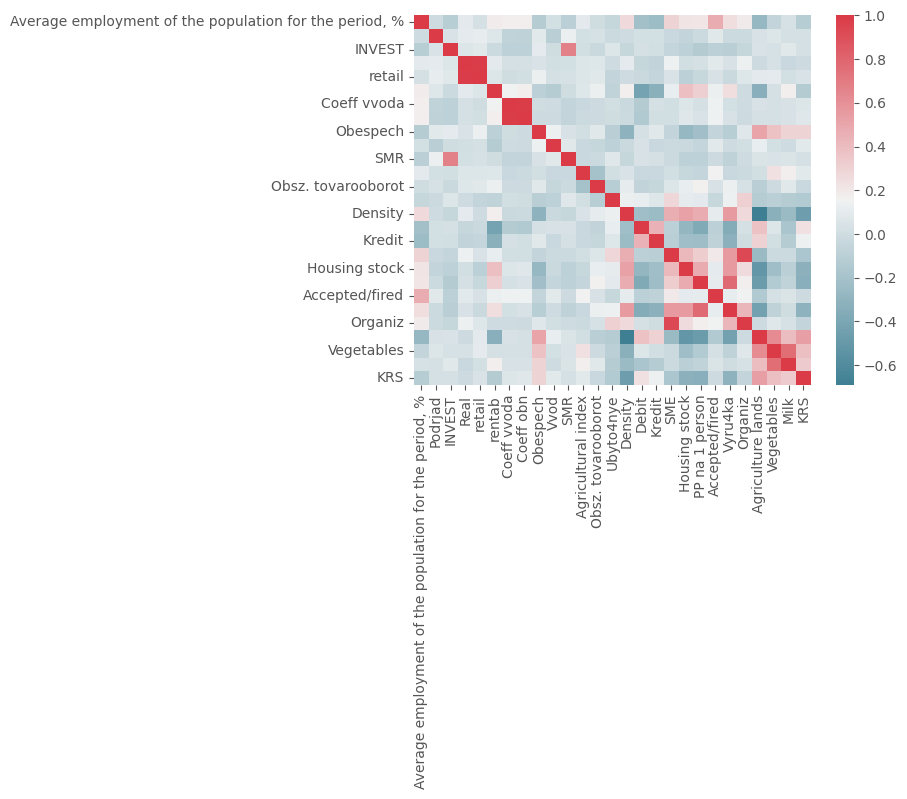

In [8]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True));

Видим, что данные фичи далеки от нормальных, корреляции между фичами не наблюдается.

In [ ]:
Метод главных компонент
=============

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html



Cтандартизируем переменные. Из предварительного анализа видно, что это важно.

In [9]:
import math
from sklearn import preprocessing
#  from sklearn.decomposition import PCA


# Функция для стандартизации фич
def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return scaled


In [10]:
df_scaled = preprocessing.scale(df)

Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод transform.

In [11]:
df_scaled

array([[ 1.72120155, -1.54776127,  0.50995488, ...,  2.80554907,
         1.85684282,  0.9305245 ],
       [ 0.06761092,  0.41222032,  2.30912082, ..., -0.72092589,
        -0.35294135, -0.61445881],
       [-0.53691073, -0.95294099, -0.70202346, ..., -0.17839168,
         0.64187327, -0.21020825],
       ...,
       [-1.03930794, -0.13871978, -0.25946335, ...,  0.1817999 ,
        -0.96011696, -0.21091081],
       [-0.85500689, -2.26934653, -1.44251619, ..., -0.07984805,
        -1.15382394,  0.4614893 ],
       [-0.5497857 ,  1.09967655, -0.51690027, ...,  1.36030513,
         2.25425457, -1.14107879]])

ПРобуем другой код

In [ ]:
## How we can reduce dimentionality using PCA in Python
def ProjectPro_Ex_179():
    print()
    print('**How we can reduce dimentionality using PCA in Python**')

    # loading libraries
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn import datasets

    # Loading Digits Data And Make Sparse


    # Standardizing the feature matrix
    X = StandardScaler().fit_transform(df1)
    print(); print('стандартизированная выборка\n', X)

    # Conducting Principal Component Analysis
    # Create a PCA that will retain 85% of the variance
    pca = PCA(n_components=0.75, whiten=True)

    # Conducting PCA
    X_pca = pca.fit_transform(X)
    print(); print(' после PCA\n', X_pca)

    # Show results
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_pca.shape[1])

    # Creating a PCA with 2 components
    pca = PCA(n_components=4, whiten=True)

    # Conducting PCA
    X_pca = pca.fit_transform(X)
    print(); print(X_pca)

    # Show results
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_pca.shape[1])

ProjectPro_Ex_179()

Попробовали

Попробуем с помощью метода главных компонент спроецировать
данные на n-мерную плоскость.
То есть выделим 2-3-4-5 главных компоненты.
Реализация метода содержится в классе ```PCA```
библиотеки ```sklearn.decomposition```.



In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=9)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)


[0.18855969 0.10020212 0.08333155 0.07345675 0.07026421 0.06005276
 0.05199984 0.04500892 0.04171593]


In [14]:
print('original', df_scaled.shape[1])
print('reduced', pca.components_.shape[1])

original 27
reduced 27


array([0.18855969, 0.10020212, 0.08333155, 0.07345675, 0.07026421,
       0.06005276, 0.05199984, 0.04500892, 0.04171593])

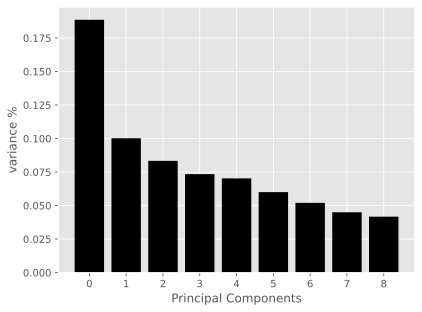

In [15]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Create a PCA instance
pca=PCA(n_components=9)
principalComponents=pca.fit_transform(df_scaled)
#Plot the expained variaces
features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color='black')
plt.xlabel("Principal Components")
plt.ylabel('variance %')
plt.xticks(features)

#Save components to a dataframe
PCA_components=pd.DataFrame(principalComponents)

#Show the expained variance by each principal component
pca.explained_variance_ratio_

In [ ]:
weights=pca.components_
weights

writer = pd.ExcelWriter('ppp.xlsx')

pd.DataFrame(eigen_vals).to_excel(df, header=False, index=False)

In [18]:
%matplotlib inline

In [ ]:
Совпадает с spss

In [20]:
n_samples = df_scaled.shape[0]
# We center the data and compute the sample covariance matrix.
df_scaled -= np.mean(df_scaled, axis=0)
cov_matrix = np.dot(df_scaled.T, df_scaled) / n_samples
for eigenvector in pca.components_:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

5.091111683029984
2.705457227076007
2.249951756449243
1.9833322596526246
1.897133761634086
1.6214246156049534
1.4039956040467028
1.215240964233288
1.1263302175140946


правильный код выводит снизу собственные вектора

In [21]:
pca = PCA(n_components=9)
X_transformed = pca.fit_transform(df_scaled)
n_samples=48
# We center the data and compute the sample covariance matrix.
X_centered = df_scaled - np.mean(df_scaled, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):
   print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
   #print(eigenvalue)

37.546948662346125
19.952747049685534
16.59339420381316
14.627075414938115
13.991361492051375
11.958006540086535
10.354467579844448
8.962402111220504
8.306685354166444


In [22]:
pca.get_covariance()

array([[ 9.30604285e-01,  4.90525525e-02, -1.37757286e-01,
         8.16077811e-02,  2.52731947e-02,  2.08937740e-01,
         1.78181453e-01,  1.83137670e-01, -1.29072892e-01,
         7.84634361e-02, -8.71967422e-02,  1.51441271e-01,
         1.30774477e-02, -5.03878472e-02,  2.79332081e-01,
        -2.11982902e-01, -2.10500397e-01,  2.87053911e-01,
         2.45185559e-01,  2.17338331e-01,  4.83095764e-01,
         2.61159474e-01,  1.94672704e-01, -2.74090371e-01,
        -5.65991255e-02,  7.37771548e-03, -1.11767274e-01],
       [ 4.90525525e-02,  7.67753652e-01,  1.08898821e-01,
         1.14889900e-01,  1.23302379e-01,  8.69470496e-02,
        -9.93308193e-02, -1.02802001e-01,  2.39160818e-02,
        -2.21456134e-01,  1.32476788e-01,  1.94828294e-02,
         1.51834396e-01, -4.21682245e-02, -3.32896708e-02,
         3.96521325e-02,  4.71327345e-02, -1.47059220e-02,
        -5.56967585e-02, -4.79514734e-02,  1.26979078e-01,
        -7.32108297e-02, -1.22951805e-02,  1.44347571e-

не работает ниже

print (pca)



Координаты самих компонент находятся в атрибуте ```components_```. коЭФФИЦИЕНТЫ ПРИ ФАКТОРАХ

In [24]:
pca.components_

array([[ 0.19040304, -0.02251139, -0.06991434,  0.03976134, -0.01488493,
         0.18639537,  0.03198244,  0.03943781, -0.18665405, -0.03918673,
        -0.05794567, -0.0167613 ,  0.06414042,  0.08465624,  0.34520403,
        -0.20606032, -0.17737144,  0.26504704,  0.32184221,  0.31839036,
         0.10627739,  0.34017145,  0.16954231, -0.35935426, -0.18990337,
        -0.11945831, -0.25380318],
       [ 0.19020892,  0.05632473, -0.01490593,  0.22648351,  0.23719448,
         0.20041973,  0.22779735,  0.23151516,  0.25016221,  0.03396971,
        -0.01082768,  0.14197689,  0.06995592, -0.08043534, -0.06831605,
        -0.17505509, -0.14465499,  0.17925863,  0.02397372,  0.0543956 ,
         0.19793402,  0.1298195 ,  0.19987684,  0.20301125,  0.41025192,
         0.41413418,  0.20718288],
       [ 0.09745364, -0.10688985, -0.20229197, -0.26370401, -0.25613653,
         0.16953708,  0.43412152,  0.43772224, -0.11629515, -0.02827245,
        -0.1925773 , -0.01145956, -0.02227705, -0.1943

In [25]:
print ('Explained variance by component: %s' % pca.explained_variance_ratio_)

Explained variance by component: [0.18855969 0.10020212 0.08333155 0.07345675 0.07026421 0.06005276
 0.05199984 0.04500892 0.04171593]


In [26]:
print ('Cumulartive variance by component: %s' % np.cumsum(pca.explained_variance_ratio_))

Cumulartive variance by component: [0.18855969 0.28876181 0.37209336 0.44555011 0.51581432 0.57586709
 0.62786692 0.67287585 0.71459178]


In [27]:
print('NumPy covariance matrix: \n%s' %np.cov(df_scaled.T))

NumPy covariance matrix: 
[[ 1.00283286e+00 -4.61666146e-03 -1.13528742e-01  9.11690627e-02
   2.34113373e-02  1.84899698e-01  1.69575134e-01  1.73407827e-01
  -1.24597992e-01  1.16493931e-02 -9.96938567e-02  8.85066039e-02
   2.51344416e-04 -4.44781639e-02  2.68281062e-01 -2.12140485e-01
  -2.47366466e-01  3.00274281e-01  2.17888818e-01  2.07952692e-01
   4.74010487e-01  2.45293746e-01  1.89210975e-01 -2.74999917e-01
  -6.13919656e-02  3.22779486e-02 -1.22658911e-01]
 [-4.61666146e-03  1.00283286e+00  4.28561493e-02  1.00279776e-01
   1.12353739e-01  6.59952562e-02 -7.11410673e-02 -8.21131980e-02
   8.36323482e-02 -1.09547839e-01  1.34257890e-01  1.37672805e-02
   3.00534619e-02 -2.30959460e-02 -4.83750424e-03  9.41954528e-03
   9.04706420e-03 -3.34136279e-02 -5.85538685e-02 -2.24505690e-02
   8.18011065e-02 -2.17724737e-02 -1.83215763e-02  4.10372894e-02
   6.14966216e-02  2.74664270e-02  2.61571765e-02]
 [-1.13528742e-01  4.28561493e-02  1.00283286e+00  5.66418398e-02
   7.83275694e

In [28]:
cov_matrix = np.cov(df_scaled.T)
print(cov_matrix)

[[ 1.00283286e+00 -4.61666146e-03 -1.13528742e-01  9.11690627e-02
   2.34113373e-02  1.84899698e-01  1.69575134e-01  1.73407827e-01
  -1.24597992e-01  1.16493931e-02 -9.96938567e-02  8.85066039e-02
   2.51344416e-04 -4.44781639e-02  2.68281062e-01 -2.12140485e-01
  -2.47366466e-01  3.00274281e-01  2.17888818e-01  2.07952692e-01
   4.74010487e-01  2.45293746e-01  1.89210975e-01 -2.74999917e-01
  -6.13919656e-02  3.22779486e-02 -1.22658911e-01]
 [-4.61666146e-03  1.00283286e+00  4.28561493e-02  1.00279776e-01
   1.12353739e-01  6.59952562e-02 -7.11410673e-02 -8.21131980e-02
   8.36323482e-02 -1.09547839e-01  1.34257890e-01  1.37672805e-02
   3.00534619e-02 -2.30959460e-02 -4.83750424e-03  9.41954528e-03
   9.04706420e-03 -3.34136279e-02 -5.85538685e-02 -2.24505690e-02
   8.18011065e-02 -2.17724737e-02 -1.83215763e-02  4.10372894e-02
   6.14966216e-02  2.74664270e-02  2.61571765e-02]
 [-1.13528742e-01  4.28561493e-02  1.00283286e+00  5.66418398e-02
   7.83275694e-02 -1.76275239e-02 -9.034

proba

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_matrix, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [ ]:
cov_matrix = np.cov(np.transpose(df_scaled))
print(cov_matrix)


pca = PCA(n_components=5)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)


In [29]:
pca = PCA(n_components=9)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled)
print("original shape:   ", df_scaled.shape)
print("transformed shape:", X_pca.shape)

original shape:    (354, 27)
transformed shape: (354, 9)


In [30]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [ ]:
eigen_values, eigen_vectors

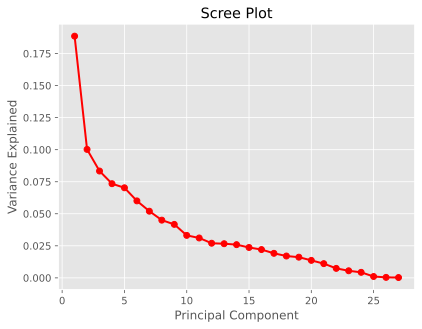

In [31]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Create an array with random values

# Fit PCA on X
pca = PCA().fit(df_scaled)

# Calculate Variance Explained
var_exp = pca.explained_variance_ratio_

# Calculate Cumulative Variance Explained
cum_var_exp = np.cumsum(var_exp)

# Plot Scree Plot
plt.plot(range(1,len(var_exp)+1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [34]:
pca.explained_variance_ratio_

array([0.18855969, 0.10020212, 0.08333155, 0.07345675, 0.07026421,
       0.06005276, 0.05199984, 0.04500892, 0.04171593, 0.03313158,
       0.03110569, 0.02700414, 0.02662907, 0.02589448, 0.02369297,
       0.02206344, 0.01913546, 0.01702941, 0.01612348, 0.01363271,
       0.01108506, 0.00738709, 0.00551814, 0.00430614, 0.00105021,
       0.00037211, 0.00024704])

In [35]:
zzz = pca.transform(df_scaled)

какая доля общей дисперсии объясняется каждым фактором////Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод transform.

In [36]:
zzz

array([[-2.87944482e-01,  3.86079528e+00, -1.32410104e+00, ...,
        -7.05626976e-02,  3.45688256e-02,  4.73227151e-02],
       [ 1.12358079e+00, -8.45559323e-01, -4.31716849e-01, ...,
         1.60525218e-01, -5.62201456e-02,  1.17538481e-02],
       [ 1.44360963e+00, -1.30087948e+00,  1.40822008e+00, ...,
        -1.94212621e-01,  4.16119312e-02, -2.19158417e-02],
       ...,
       [-1.80095991e+00, -9.65742844e-01, -3.33557799e-01, ...,
        -1.86656941e-01,  7.83884873e-03,  5.73016805e-04],
       [-1.81804102e+00, -2.84135193e+00,  7.12068328e-02, ...,
         1.08531287e-01, -3.96405366e-02,  7.61072593e-03],
       [-3.96100826e-01,  8.63782848e-01, -8.70659865e-01, ...,
         2.31076908e-01, -4.14234231e-02,  4.94035000e-02]])

Факторный анализ
=========


http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html


Попробуем с помощью факторного анализа построить новые фичи, которые были бы более удобными в использовании с минимальной потерей информации.

Используем класс ```FactorAnalysis``` из ```sklearn.decomposition```.
Начнём с 3-4-5-6 факторов.

In [40]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=20cbad97f3e4ec593d537251000aaa686acce133e39c79eb0b0be0cd3392bb0a
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [41]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=9)
fa.set_params(rotation='varimax')
fa.fit(df_scaled)
kak=pd.DataFrame(fa.components_, columns=df.columns)

Метод варимакс,но метод НЕ proncipal

In [42]:
kak

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
0,0.040940,0.104881,0.055157,0.990919,0.993228,0.071244,0.003308,0.006791,0.078324,0.010460,...,0.048820,-0.052774,-0.006826,0.046023,-0.007317,0.056731,0.031243,0.048713,-0.030077,0.010480
1,0.142023,-0.078528,-0.063649,0.013389,-0.002803,0.143313,0.992857,0.992604,-0.009463,-0.011940,...,0.001514,0.058496,0.019223,0.117108,0.013213,-0.009887,0.038999,0.008997,0.022566,0.064296
2,0.185586,-0.034547,-0.030615,0.084475,0.007565,-0.006360,-0.000287,-0.006187,0.042419,-0.011693,...,0.935724,0.259285,0.102187,0.130649,0.355959,0.973255,-0.051656,0.025511,0.002883,-0.064382
3,0.036338,-0.052058,-0.028476,0.014500,-0.047040,-0.091407,-0.014699,-0.015284,-0.346779,0.004935,...,0.026451,0.162704,0.090773,-0.020688,0.031916,-0.043071,-0.565046,-0.946801,-0.825457,-0.384298
4,0.156079,-0.005597,-0.074851,0.018748,-0.027475,0.251327,-0.003231,0.025161,-0.133707,0.004640,...,0.252720,0.493072,0.830249,0.046597,0.867893,0.099970,-0.402415,-0.057020,-0.009997,-0.306418
5,-0.085487,0.102747,0.800893,0.010433,0.024692,0.014056,-0.030465,-0.028365,0.053639,0.047509,...,-0.007166,-0.050780,-0.069491,-0.028463,-0.042211,-0.011249,0.001568,0.008962,0.047243,-0.013287
6,-0.125657,0.034511,-0.004257,-0.038039,0.050085,-0.258317,0.005968,0.001277,0.479906,0.197689,...,-0.128142,-0.313118,-0.095171,-0.049309,-0.032436,0.071975,0.586756,0.076838,0.019070,0.258582
7,-0.134435,-0.001821,-0.030633,-0.005310,-0.017641,-0.447222,-0.019096,-0.028476,-0.082860,0.055504,...,-0.031701,-0.146147,-0.090263,-0.033734,-0.100900,0.039316,0.302289,0.076431,-0.242813,0.104700
8,0.621854,0.078301,-0.062142,0.033927,-0.004667,0.097636,0.039773,0.037486,-0.082300,0.114923,...,0.088738,0.057320,0.036912,0.668658,0.031149,0.021717,-0.133330,0.001632,0.037914,-0.004418


Координаты факторов в пространстве старых фич находятся в атрибуте ```components_```.

Верный варимакс- метод -pricipal

The method must be one of the following: ['ml', 'mle', 'uls', 'minres', 'principal']

In [45]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(9, rotation="varimax", method='principal', use_smc=True)
fa.fit(df_scaled)
loadings = fa.loadings_

In [ ]:
Верный варимакс, совпадает с SPSS-матрица нагрузок

In [46]:
loadings

array([[ 2.32860612e-01, -1.02803486e-01,  1.19742098e-01,
         1.52706815e-01,  2.22047454e-02, -8.90423644e-02,
        -8.20067863e-02,  7.23136085e-01, -4.64693134e-02],
       [-6.89301525e-02,  6.47466608e-02, -1.43507104e-01,
        -5.97758645e-02,  1.10546064e-01,  1.67153033e-01,
         1.87621163e-01,  2.63320908e-01,  5.81470335e-01],
       [ 2.44519893e-04,  4.03250060e-02, -4.52519504e-02,
        -2.53871348e-02,  5.18118065e-02,  8.88681990e-01,
        -3.84820905e-02, -9.99709878e-02, -3.41371412e-04],
       [ 4.96149619e-02, -1.65026943e-02,  1.51503545e-02,
         8.22719699e-02,  9.85574412e-01,  1.52243231e-02,
        -7.44900638e-03,  4.56116333e-02,  2.84827203e-02],
       [ 1.57074763e-02,  7.48916960e-02, -1.69229880e-03,
        -5.04684022e-03,  9.90475911e-01,  2.96013921e-02,
         1.54500323e-02,  5.22599409e-03,  2.17727612e-02],
       [ 6.63896800e-01,  1.72718496e-02,  1.64460198e-01,
        -4.36586679e-02,  5.50777415e-02,  3.159542

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
new_loadings = np.resize(loadings, (20, 10))

In [49]:
plt.figure(figsize=(20, 16))

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

In [51]:
ff=plt.figure(figsize=(400, 320))

<Figure size 40000x32000 with 0 Axes>

In [ ]:
matfig = plt.figure(figsize=(8,8))
plt.matshow(d.corr(), fignum=matfig.number)

Text(0.5, 0, 'Главные компоненты')

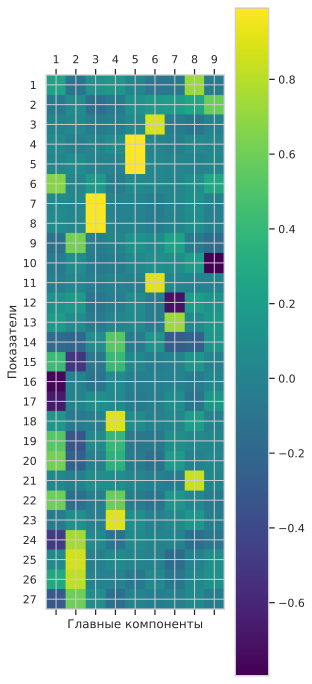

In [52]:
plt.matshow(loadings, cmap='viridis',fignum=ff.number)
plt.xticks([0,1,2,3,4,5,6,7,8], ["1", "2", "3", "4","5","6","7","8","9"], rotation=0)
#plt.figure(figsize=(20, 20))
plt.colorbar()
#plt.xlabel([1,2,3,4,5,6,7,8,9,10,11])
#xticks=([1, 30])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], ["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27"], rotation=0)
plt.ylabel("Показатели")
plt.xlabel("Главные компоненты")

In [ ]:
!pip install factor_analyzer

In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
fa = FactorAnalyzer()
fa.set_params(rotation='varimax')
fa.fit(df)
loadings = fa.loadings_
eigen_values, vectors = fa.get_eigenvalues()

In [ ]:
eigen_values, vectors

map= pd.DataFrame(loadings, ["Первая компонента", "Вторая компонента", "Третья компонента", "Четвертая компонента"])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')


In [57]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

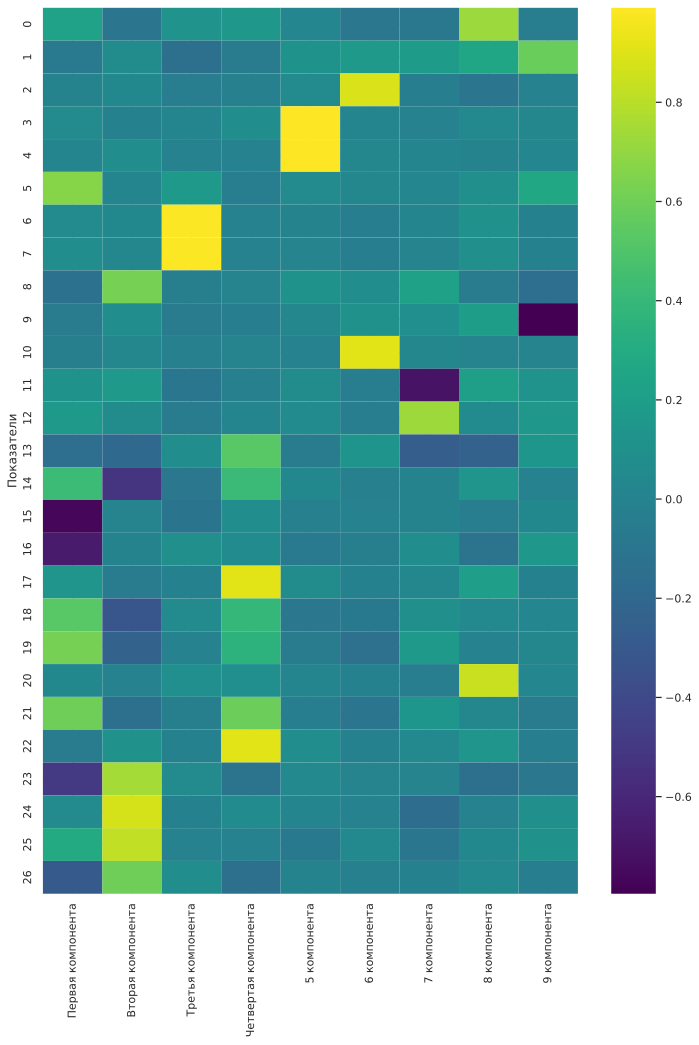

In [58]:
plt.figure(figsize=(12,16))
sns.heatmap(loadings, xticklabels=["Первая компонента", "Вторая компонента", "Третья компонента", "Четвертая компонента","5 компонента", "6 компонента", "7 компонента", "8 компонента", "9 компонента"],cmap='viridis');
plt.ylabel('Показатели')
plt.show()

In [59]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

KМО КАйзера kaizera

In [60]:
#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(df_scaled)
print(kmo_model)
print(kmo_all)

6751.915522307638 0.0
0.6549506571918599
[0.7264653  0.49220651 0.518931   0.44241219 0.43860978 0.77700112
 0.49846456 0.50388321 0.76479341 0.44597402 0.5051651  0.51587524
 0.44141083 0.643028   0.86949402 0.78687525 0.7841858  0.61101782
 0.85216739 0.7837936  0.64771823 0.78951512 0.49921579 0.69468874
 0.60669767 0.64665796 0.85990501]


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [63]:

from google.colab import files

df.to_excel('file.xlsx', index=False, header=False)


# Скачивание файла
files.download('file.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод ```transform```.